In [1]:
import osmnx as ox
import pandas as pd
from geosnap import DataStore

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [10]:
df = pd.read_csv('../data/network_comparison.csv')

In [11]:
df

,Unnamed: 0,fips,name,planar_measure,network_measure,seg_difference,p_value
0,0,10180,"Abilene, TX",0.103013,0.138835,0.035823,0.0732
1,1,10420,"Akron, OH",0.250862,0.288858,0.037996,0.0588
2,2,10500,"Albany, GA",0.305961,0.317874,0.011913,0.7482
3,3,10540,"Albany-Lebanon, OR",0.077134,0.111615,0.034481,0.1616
4,4,10580,"Albany-Schenectady-Troy, NY",0.158289,0.198885,0.040596,0.0124
...,...,...,...,...,...,...,...
375,375,49420,"Yakima, WA",0.204760,0.233521,0.028761,0.2710
376,376,49620,"York-Hanover, PA",0.210115,0.242871,0.032755,0.1028
377,377,49660,"Youngstown-Warren-Boardman, OH-PA",0.271484,0.320095,0.048611,0.0126
378,378,49700,"Yuba City, CA",0.088701,0.112363,0.023662,0.3578


In [17]:
df.loc[df.p_value <= 0.050, "significant"] = 1
df.significant=df.significant.fillna(0)

In [21]:
df

,Unnamed: 0,fips,name,planar_measure,network_measure,seg_difference,p_value,significant
0,0,10180,"Abilene, TX",0.103013,0.138835,0.035823,0.0732,0.0
1,1,10420,"Akron, OH",0.250862,0.288858,0.037996,0.0588,0.0
2,2,10500,"Albany, GA",0.305961,0.317874,0.011913,0.7482,0.0
3,3,10540,"Albany-Lebanon, OR",0.077134,0.111615,0.034481,0.1616,0.0
4,4,10580,"Albany-Schenectady-Troy, NY",0.158289,0.198885,0.040596,0.0124,1.0
...,...,...,...,...,...,...,...,...
375,375,49420,"Yakima, WA",0.204760,0.233521,0.028761,0.2710,0.0
376,376,49620,"York-Hanover, PA",0.210115,0.242871,0.032755,0.1028,0.0
377,377,49660,"Youngstown-Warren-Boardman, OH-PA",0.271484,0.320095,0.048611,0.0126,1.0
378,378,49700,"Yuba City, CA",0.088701,0.112363,0.023662,0.3578,0.0


In [13]:
df_significant = df_significant.drop(columns=['Unnamed: 0']).reset_index(drop=True)

In [14]:
df_significant

,fips,name,planar_measure,network_measure,seg_difference,p_value
0,10580,"Albany-Schenectady-Troy, NY",0.158289,0.198885,0.040596,0.0124
1,10900,"Allentown-Bethlehem-Easton, PA-NJ",0.208605,0.244326,0.035721,0.0158
2,11260,"Anchorage, AK",0.091620,0.134688,0.043068,0.0024
3,12060,"Atlanta-Sandy Springs-Alpharetta, GA",0.293168,0.321024,0.027856,0.0006
4,12420,"Austin-Round Rock-Georgetown, TX",0.151556,0.174359,0.022803,0.0064
...,...,...,...,...,...,...
91,47260,"Virginia Beach-Norfolk-Newport News, VA-NC",0.161378,0.206113,0.044735,0.0000
92,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",0.220044,0.240330,0.020286,0.0012
93,48620,"Wichita, KS",0.192697,0.233450,0.040754,0.0310
94,49340,"Worcester, MA-CT",0.156101,0.199933,0.043832,0.0012


In [15]:
datasets = DataStore()

In [16]:
from geosnap.io import get_acs

In [ ]:
def generate_network_measures

In [20]:
dc = get_acs(datasets, years=2019, msa_fips='47900')

<AxesSubplot:>

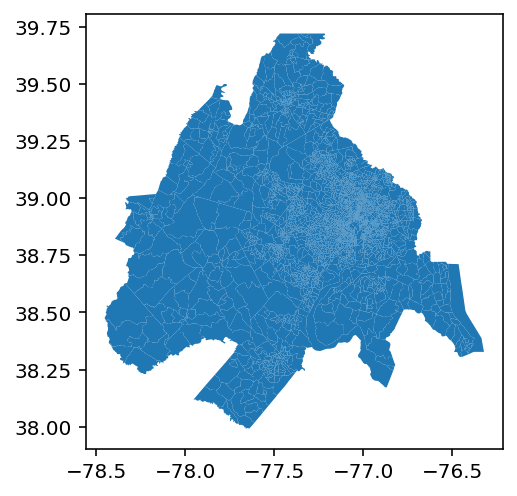

In [21]:
dc.plot()

In [22]:
AREA = dc.to_crs(dc.estimate_utm_crs()).area.sum()

In [10]:
ox.graph_from_polygon?

Signature:
ox.graph_from_polygon(
    polygon,
    network_type='all_private',
    simplify=True,
    retain_all=False,
    truncate_by_edge=False,
    clean_periphery=True,
    custom_filter=None,
)
Docstring:
Create a graph from OSM within the boundaries of some shapely polygon.

Parameters
----------
polygon : shapely.geometry.Polygon or shapely.geometry.MultiPolygon
    the shape to get network data within. coordinates should be in
    unprojected latitude-longitude degrees (EPSG:4326).
network_type : string {"all_private", "all", "bike", "drive", "drive_service", "walk"}
    what type of street network to get if custom_filter is None
simplify : bool
    if True, simplify graph topology with the `simplify_graph` function
retain_all : bool
    if True, return the entire graph even if it is not connected.
    otherwise, retain only the largest weakly connected component.
truncate_by_edge : bool
    if True, retain nodes outside boundary polygon if at least one of
    node's neighbors

In [23]:
dc_graph = ox.graph_from_polygon(dc.unary_union, network_type='walk')

In [13]:
balt_graph.

In [24]:
ox.stats.basic_stats(dc_graph, area=AREA)

{'n': 822595,
 'm': 2200402,
 'k_avg': 5.349903658543998,
 'edge_length_total': 187328855.63200563,
 'edge_length_avg': 85.13392354306424,
 'streets_per_node_avg': 2.6754636242622434,
 'streets_per_node_counts': {0: 0,
  1: 202226,
  2: 6,
  3: 486641,
  4: 130431,
  5: 2900,
  6: 326,
  7: 39,
  8: 25,
  9: 1},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.24583908241601274,
  2: 7.293990359776075e-06,
  3: 0.5915924604452981,
  4: 0.1585604094359922,
  5: 0.0035254286738917694,
  6: 0.00039630680954783336,
  7: 4.7410937338544485e-05,
  8: 3.0391626499066978e-05,
  9: 1.215665059962679e-06},
 'intersection_count': 620369,
 'street_length_total': 93664419.41699779,
 'street_segment_count': 1100200,
 'street_length_avg': 85.13399328939992,
 'circuity_avg': 1.1152588230018345,
 'self_loop_proportion': 0.01136338847482276,
 'node_density_km': 45.333951422838716,
 'intersection_density_km': 34.189094402755956,
 'edge_density_km': 10323.861974990501,
 'street_density_km': 5161.930524618

In [15]:
ox.stats.basic_stats?

Signature:
ox.stats.basic_stats(
    G,
    area=None,
    clean_int_tol=None,
    clean_intersects=None,
    tolerance=None,
    circuity_dist=None,
)
Docstring:
Calculate basic descriptive geometric and topological measures of a graph.

Density measures are only calculated if `area` is provided and clean
intersection measures are only calculated if `clean_int_tol` is provided.

Parameters
----------
G : networkx.MultiDiGraph
    input graph
area : float
    if not None, calculate density measures and use this area value (in
    square meters) as the denominator
clean_int_tol : float
    if not None, calculate consolidated intersections count (and density,
    if `area` is also provided) and use this tolerance value; refer to the
    `simplification.consolidate_intersections` function documentation for
    details
clean_intersects : bool
    deprecated, do not use
tolerance : float
    deprecated, do not use
circuity_dist : string
    deprecated, do not use

Returns
-------
stats : di

In [26]:
pd.DataFrame.from_dict(ox.stats.basic_stats(dc_graph, area=AREA))

,n,m,k_avg,edge_length_total,edge_length_avg,streets_per_node_avg,streets_per_node_counts,streets_per_node_proportions,intersection_count,street_length_total,street_segment_count,street_length_avg,circuity_avg,self_loop_proportion,node_density_km,intersection_density_km,edge_density_km,street_density_km
0,822595,2200402,5.349904,1.873289e+08,85.133924,2.675464,0,0.000000,620369,9.366442e+07,1100200,85.133993,1.115259,0.011363,45.333951,34.189094,10323.861975,5161.930525
1,822595,2200402,5.349904,1.873289e+08,85.133924,2.675464,202226,0.245839,620369,9.366442e+07,1100200,85.133993,1.115259,0.011363,45.333951,34.189094,10323.861975,5161.930525
2,822595,2200402,5.349904,1.873289e+08,85.133924,2.675464,6,0.000007,620369,9.366442e+07,1100200,85.133993,1.115259,0.011363,45.333951,34.189094,10323.861975,5161.930525
3,822595,2200402,5.349904,1.873289e+08,85.133924,2.675464,486641,0.591592,620369,9.366442e+07,1100200,85.133993,1.115259,0.011363,45.333951,34.189094,10323.861975,5161.930525
4,822595,2200402,5.349904,1.873289e+08,85.133924,2.675464,130431,0.158560,620369,9.366442e+07,1100200,85.133993,1.115259,0.011363,45.333951,34.189094,10323.861975,5161.930525
5,822595,2200402,5.349904,1.873289e+08,85.133924,2.675464,2900,0.003525,620369,9.366442e+07,1100200,85.133993,1.115259,0.011363,45.333951,34.189094,10323.861975,5161.930525
6,822595,2200402,5.349904,1.873289e+08,85.133924,2.675464,326,0.000396,620369,9.366442e+07,1100200,85.133993,1.115259,0.011363,45.333951,34.189094,10323.861975,5161.930525
7,822595,2200402,5.349904,1.873289e+08,85.133924,2.675464,39,0.000047,620369,9.366442e+07,1100200,85.133993,1.115259,0.011363,45.333951,34.189094,10323.861975,5161.930525
8,822595,2200402,5.349904,1.873289e+08,85.133924,2.675464,25,0.000030,620369,9.366442e+07,1100200,85.133993,1.115259,0.011363,45.333951,34.189094,10323.861975,5161.930525
9,822595,2200402,5.349904,1.873289e+08,85.133924,2.675464,1,0.000001,620369,9.366442e+07,1100200,85.133993,1.115259,0.011363,45.333951,34.189094,10323.861975,5161.930525
